In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def make_df(cols,ind):
    data={c:[str(c)+str(i) for i in ind]
           for c in cols}
    return pd.DataFrame(data,ind)
make_df('ABC',range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [3]:
x=[1,2,3]
y=[4,5,6]
z=[7,8,9]
np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
df5=make_df('ABC', [1, 2])
df6=make_df('BCD',[3,4])

In [5]:
j=pd.concat([df5,df6])
j

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [6]:
df5

,A,B,C
1,A1,B1,C1
2,A2,B2,C2


In [7]:
df6

,B,C,D
3,B3,C3,D3
4,B4,C4,D4


In [8]:
pd.concat([df5,df6],join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [9]:
df5.append(df6)

C:\Users\Amell\AppData\Local\Temp\ipykernel_2340\551904218.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5.append(df6)


,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [10]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [11]:
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
 'hire_date': [2004, 2008, 2012, 2014]})
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [12]:
df3=pd.merge(df1,df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [13]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
 'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [14]:
dtf=pd.merge(df3,df4)
dtf

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [15]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
 'Engineering', 'Engineering', 'HR', 'HR'],'skills': ['math', 'spreadsheets', 'coding', 'linux',
 'spreadsheets', 'organization']})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [16]:
pd.merge(dtf,df5,on='group')

,employee,group,hire_date,supervisor,skills
0,Bob,Accounting,2008,Carly,math
1,Bob,Accounting,2008,Carly,spreadsheets
2,Jake,Engineering,2012,Guido,coding
3,Jake,Engineering,2012,Guido,linux
4,Lisa,Engineering,2004,Guido,coding
5,Lisa,Engineering,2004,Guido,linux
6,Sue,HR,2014,Steve,spreadsheets
7,Sue,HR,2014,Steve,organization


In [17]:
dfk= pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'salary': [70000, 80000, 120000, 90000]})
dfk

,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [18]:
pd.merge(df1,dfk,left_on='employee',right_on='name').drop('name',axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [19]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'rank': [1, 2, 3, 4]})
df8

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


In [20]:
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
 'rank': [3, 1, 4, 2]})
df9

,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


In [21]:
pd.merge(df8,df9,on='name',suffixes=['_L','_R'])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [22]:
pop = pd.read_csv('C:\\Users\\Amell\\Downloads\\state-population.csv')
areas = pd.read_csv('C:\\Users\\Amell\\Downloads\\state-areas.csv')
abbrevs = pd.read_csv('C:\\Users\\Amell\\Downloads\\state-abbrevs.csv')

In [23]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [24]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [25]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [26]:
dk=pd.merge(pop,abbrevs,how='outer',left_on='state/region',right_on='abbreviation').drop('abbreviation',1)
dk.head()

C:\Users\Amell\AppData\Local\Temp\ipykernel_2340\2164170610.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dk=pd.merge(pop,abbrevs,how='outer',left_on='state/region',right_on='abbreviation').drop('abbreviation',1)


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [27]:
dk.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [28]:
dk[dk['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [29]:
dk.loc[dk['state'].isnull(),'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [30]:
dk.loc[dk['state/region'] == 'PR', 'state'] = 'Puerto Rico'
dk.loc[dk['state/region'] == 'USA', 'state'] = 'United States'
dk.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [31]:
finale=pd.merge(dk,areas,on='state',how='outer')
finale.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [32]:
finale.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [33]:
finale['state'][finale['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [34]:
finale.dropna(inplace=True)

In [35]:
finale.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [36]:
import  numexpr

In [37]:
data2010=finale.query("year == 2010 & ages =='total'")
data2010

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0
283,CO,total,2010,5048196.0,Colorado,104100.0
293,CT,total,2010,3579210.0,Connecticut,5544.0
379,DE,total,2010,899711.0,Delaware,1954.0
389,DC,total,2010,605125.0,District of Columbia,68.0
475,FL,total,2010,18846054.0,Florida,65758.0


In [38]:
 data2010.set_index('state', inplace=True)

In [39]:
data2010.head()

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [40]:
density = data2010['population'] / data2010['area (sq. mi)']
density

state
Alabama                   91.287603
Alaska                     1.087509
Arizona                   56.214497
Arkansas                  54.948667
California               228.051342
Colorado                  48.493718
Connecticut              645.600649
Delaware                 460.445752
District of Columbia    8898.897059
Florida                  286.597129
Georgia                  163.409902
Hawaii                   124.746707
Idaho                     18.794338
Illinois                 221.687472
Indiana                  178.197831
Iowa                      54.202751
Kansas                    34.745266
Kentucky                 107.586994
Louisiana                 87.676099
Maine                     37.509990
Maryland                 466.445797
Massachusetts            621.815538
Michigan                 102.015794
Minnesota                 61.078373
Mississippi               61.321530
Missouri                  86.015622
Montana                    6.736171
Nebraska              

In [41]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [42]:
import seaborn as sns
planets=sns.load_dataset('planets')
planets.shape

(1035, 6)

In [43]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [44]:
t=planets.dropna().describe()
t

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [45]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
 'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [46]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [47]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [48]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [49]:
for (method, group) in planets.groupby('method'):
 print("{0:30s} shape={1}".format(method, group.shape))


Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [50]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [51]:
rng=np.random.RandomState(0)

In [52]:
df1=pd.DataFrame({'key':list('ABCABC'),
               'data1':range(6),
               'data2':rng.randint(0,10,6)},
               columns=['key','data1','data2'])
df1

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [53]:
df.groupby('key').aggregate(['min',np.median,max])

data           
     min median max
key                
A      0    1.5   3
B      1    2.5   4
C      2    3.5   5

In [54]:
df1.groupby('key').aggregate({'data1':'min',
                            'data2':'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [55]:
def filter_func(x):
    return x['data2'].std()>4


In [56]:
df1.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [57]:
df1

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [58]:
df1.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [59]:
df1.groupby('key').transform(lambda x:x-x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [60]:
def norm_by_data(x):
    x['data1']/=x['data2'].sum()
    return x


In [61]:
l=[0,1,0,1,2,0]
l

[0, 1, 0, 1, 2, 0]

In [62]:
df1.groupby(l).sum()

C:\Users\Amell\AppData\Local\Temp\ipykernel_2340\2908388498.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(l).sum()


,data1,data2
0,7,17
1,4,3
2,4,7


In [63]:
titanic = sns.load_dataset('titanic')

In [64]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [65]:
titanic.groupby('sex')[['survived']].sum()

,survived
sex,
female,233
male,109


In [66]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [67]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [68]:
age=pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [69]:
fare=pd.qcut(titanic['fare'],10)
titanic.pivot_table('survived',['sex',age],[fare,'class'])

fare            (-0.001, 7.55]           (7.55, 7.854] (7.854, 8.05]  \
class                    First     Third         Third         Third   
sex    age                                                             
female (0, 18]             NaN  0.750000      0.500000      1.000000   
       (18, 80]            NaN  1.000000      0.545455      0.500000   
male   (0, 18]             NaN  0.000000      0.000000      0.666667   
       (18, 80]            0.0  0.106383      0.142857      0.142857   

fare            (8.05, 10.5]           (10.5, 14.454]       (14.454, 21.679]  \
class                 Second     Third         Second Third           Second   
sex    age                                                                     
female (0, 18]      1.000000  0.666667       1.000000  0.75            1.000   
       (18, 80]     0.857143  0.181818       0.888889  0.50            0.875   
male   (0, 18]      0.000000  0.142857       0.000000  1.00            1.000   
       (18, 80]     0.133333  0.111111       0.083333  0.00            0.000   

fare                      (21.679, 27.0]                 (27.0, 39.688]  \
class               Third          First    Second Third          First   
sex    age                                                                
female (0, 18]   0.454545            NaN  1.000000   0.5       1.000000   
       (18, 80]  0.571429       1.000000  0.894737   0.0       0.800000   
male   (0, 18]   0.444444            NaN  0.666667   NaN            NaN   
       (18, 80]  0.125000       0.555556  0.062500   0.0       0.363636   

fare                             (39.688, 77.958]               \
class           Second     Third            First Second Third   
sex    age                                                       
female (0, 18]     1.0  0.125000         1.000000    1.0  0.00   
       (18, 80]    1.0  0.142857         1.000000    1.0  0.00   
male   (0, 18]     1.0  0.066667              NaN    0.0  0.00   
       (18, 80]    0.0  0.000000         0.357143    0.0  0.75   

fare            (77.958, 512.329]  
class                       First  
sex    age                         
female (0, 18]           0.875000  
       (18, 80]          0.976190  
male   (0, 18]           0.800000  
       (18, 80]          0.333333

In [70]:
titanic.pivot_table(index='sex',columns='class',aggfunc={'survived':sum,'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [71]:
titanic.pivot_table('survived',index=['sex'],columns=['class','fare'],margins=True)

class  First                                                           \
fare     0.0  5.0 25.5875 25.925 25.9292 26.0 26.2833 26.2875 26.3875   
sex                                                                     
female   NaN  NaN     NaN    NaN     1.0  NaN     1.0     NaN     NaN   
male     0.0  0.0     0.0    0.0     NaN  0.0     NaN     1.0     1.0   
All      0.0  0.0     0.0    0.0     1.0  0.0     1.0     1.0     1.0   

class             ... Third                                            \
fare       26.55  ...  27.9 29.125 31.275 31.3875 34.375 39.6875 46.9   
sex               ...                                                   
female  1.000000  ...   0.0    0.0    0.0    1.00    0.0     0.0  0.0   
male    0.500000  ...   0.0    0.0    0.0    0.50    0.0     0.0  0.0   
All     0.533333  ...   0.0    0.0    0.0    0.75    0.0     0.0  0.0   

class                        All  
fare     56.4958 69.55            
sex                               
female       NaN   0.0  0.742038  
male    0.714286   0.0  0.188908  
All     0.714286   0.0  0.383838  

[3 rows x 256 columns]

In [72]:
births=pd.read_csv('C:\\Users\\Amell\\Downloads\\births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [73]:
births['decade']=10*(births['year']//10)
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


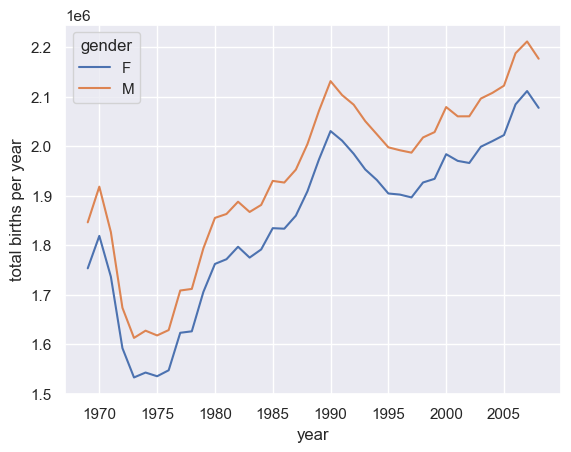

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [75]:
import numpy as np
data = np.array([1, 2, 3, 4, 100, 5, 6, 200, 7, 8])

In [76]:
threshold=2.5
max_iterations=5


In [77]:
for i in range(max_iterations):
    median=np.median(data)
    std=np.std(data)
    cutoff=threshold*std
    outliers=np.abs(data-median)>cutoff
    data = np.ma.masked_array(data, outliers)
    
    if not np.any(outliers):
        break
data = data.compressed()        
print(data)

[1 2 3 4 5 6 7 8]


C:\Users\Amell\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [78]:
quartiles=np.percentile(births['births'],[25,50,75])
mu=quartiles[1]
sig=0.74*(quartiles[2]-quartiles[0])

In [79]:
x = "Hello, World!"[-1]
x

'!'

In [80]:
x, y, z = "7", "8", "9"
print(type(int(x)))

<class 'int'>


In [81]:
"def" in ["a", "b", "c", "d", "e", "f"]

False

In [82]:
x = 3
while (x < 10):
    x += 2

In [83]:
x

11

In [84]:
def one():
    print("one")

def two():
    return "two"

def three():
    one()
    two()
    print("three")

three()

one
three


In [85]:
data = [
    {"color": "blue", "number": 64},
    {"color": "green", "number": 710},
    {"color": "red", "number": 17},
    {"color": "orange", "number": 110},
    {"color": "green", "number": 49},
    {"color": "yellow", "number": 63}
]

In [86]:
import re

In [87]:
bret='''
I came home to fine that you were not there
abcdefghijklmnop
HSGYWIEUH
321-234-7897
456.546.3456
800.476.2536
900.736.2653
800*526*5538

graphic designer came home yesterday forsome shoot 
'''


In [88]:
pattern=re.compile(r'[a-hA-J]')
matches=pattern.finditer(bret)

In [89]:
for match in matches:
    print(match)

<re.Match object; span=(1, 2), match='I'>
<re.Match object; span=(3, 4), match='c'>
<re.Match object; span=(4, 5), match='a'>
<re.Match object; span=(6, 7), match='e'>
<re.Match object; span=(8, 9), match='h'>
<re.Match object; span=(11, 12), match='e'>
<re.Match object; span=(16, 17), match='f'>
<re.Match object; span=(19, 20), match='e'>
<re.Match object; span=(22, 23), match='h'>
<re.Match object; span=(23, 24), match='a'>
<re.Match object; span=(31, 32), match='e'>
<re.Match object; span=(33, 34), match='e'>
<re.Match object; span=(40, 41), match='h'>
<re.Match object; span=(41, 42), match='e'>
<re.Match object; span=(43, 44), match='e'>
<re.Match object; span=(45, 46), match='a'>
<re.Match object; span=(46, 47), match='b'>
<re.Match object; span=(47, 48), match='c'>
<re.Match object; span=(48, 49), match='d'>
<re.Match object; span=(49, 50), match='e'>
<re.Match object; span=(50, 51), match='f'>
<re.Match object; span=(51, 52), match='g'>
<re.Match object; span=(52, 53), match='h'

In [90]:
with open('C:\\Users\\Amell\\Desktop\\uber.csv','r') as file:
    contents= file.read()
    

In [91]:
import pandas as pd
import numpy as np

In [92]:
np.linspace(0,10,100)

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [93]:
from datetime import datetime

In [94]:
datetime(year=2015,month=7,day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [95]:
from dateutil import parser

In [96]:
date=parser.parse('9th of June,2023')
date

datetime.datetime(2023, 6, 9, 0, 0)

In [97]:
date.strftime('%A')

'Friday'

In [98]:
datey=np.array('2015-07-04',dtype=np.datetime64)
datey

array('2015-07-04', dtype='datetime64[D]')

In [99]:
datey+np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [100]:
st=pd.to_datetime('9th of July,2023')
st.strftime('%A')

'Sunday'

In [101]:
st.strftime('%A')

'Sunday'

In [102]:
st+pd.to_timedelta(np.arange(20),'D')

DatetimeIndex(['2023-07-09', '2023-07-10', '2023-07-11', '2023-07-12',
               '2023-07-13', '2023-07-14', '2023-07-15', '2023-07-16',
               '2023-07-17', '2023-07-18', '2023-07-19', '2023-07-20',
               '2023-07-21', '2023-07-22', '2023-07-23', '2023-07-24',
               '2023-07-25', '2023-07-26', '2023-07-27', '2023-07-28'],
              dtype='datetime64[ns]', freq=None)

In [103]:
index=pd.DatetimeIndex(['2014-07-04','2014-08-04','2015-07-04','2015-08-04'])
da=pd.Series([0,1,2,3],index=index)

In [104]:
da

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [105]:
da['2014-08-04':'2016-01-09']

2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [106]:
ate=pd.to_datetime([datetime(2015,7,3),'4th of July,2015','2015-Jul-6','07-07-2015','20150708'])
ate

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [107]:
ate.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [108]:
ate-ate[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [109]:
pd.date_range('2023-06-09',periods=8,freq='MS')

DatetimeIndex(['2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01'],
              dtype='datetime64[ns]', freq='MS')

In [110]:
pd.timedelta_range(0,periods=10,freq='D')

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days', '5 days',
                '6 days', '7 days', '8 days', '9 days'],
               dtype='timedelta64[ns]', freq='D')

In [111]:
pd.timedelta_range(0,periods=10,freq='2D2H30T')

TimedeltaIndex([ '0 days 00:00:00',  '2 days 02:30:00',  '4 days 05:00:00',
                 '6 days 07:30:00',  '8 days 10:00:00', '10 days 12:30:00',
                '12 days 15:00:00', '14 days 17:30:00', '16 days 20:00:00',
                '18 days 22:30:00'],
               dtype='timedelta64[ns]', freq='3030T')

In [112]:
from pandas_datareader import data

In [113]:
g=sorted([22, 56, 11, 4, -17, 6, 80,-126])
np.median(g)

8.5

In [114]:
from plotnine import *

In [115]:
mpg=pd.read_excel('C:\\Users\\Amell\\Desktop\\mpg.xlsx')

In [116]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


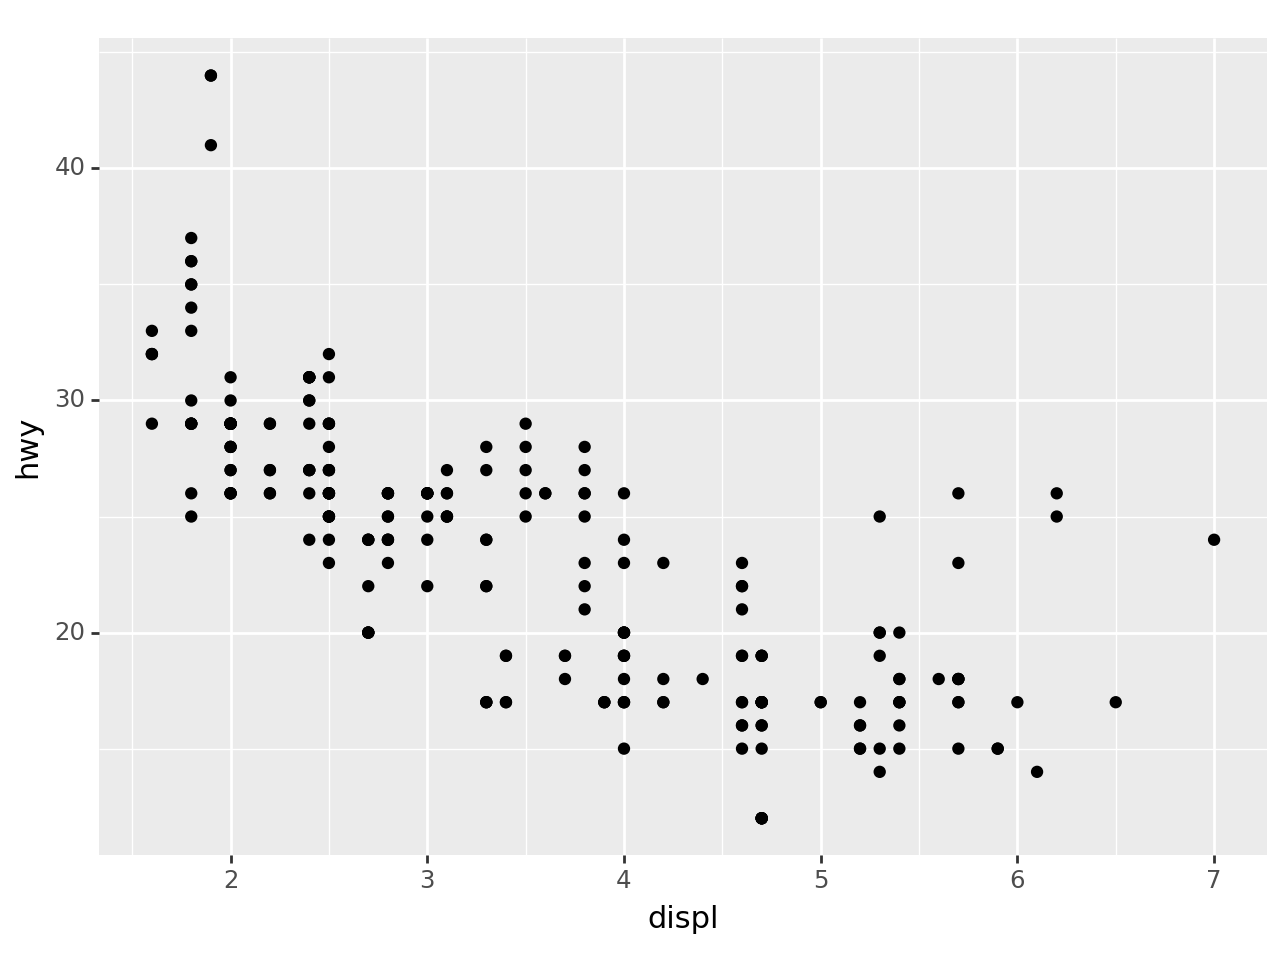

<Figure Size: (640 x 480)>

In [117]:
ggplot(data=mpg) +geom_point(mapping=aes(x="displ", y="hwy"))

In [118]:
import subprocess

In [119]:
subprocess.run(['Rscript', 'generate_plot.R'])

CompletedProcess(args=['Rscript', 'generate_plot.R'], returncode=3221225477)

In [120]:
import matplotlib.pyplot as plt
from PIL import Image


C:\Users\Amell\anaconda3\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (111974400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.


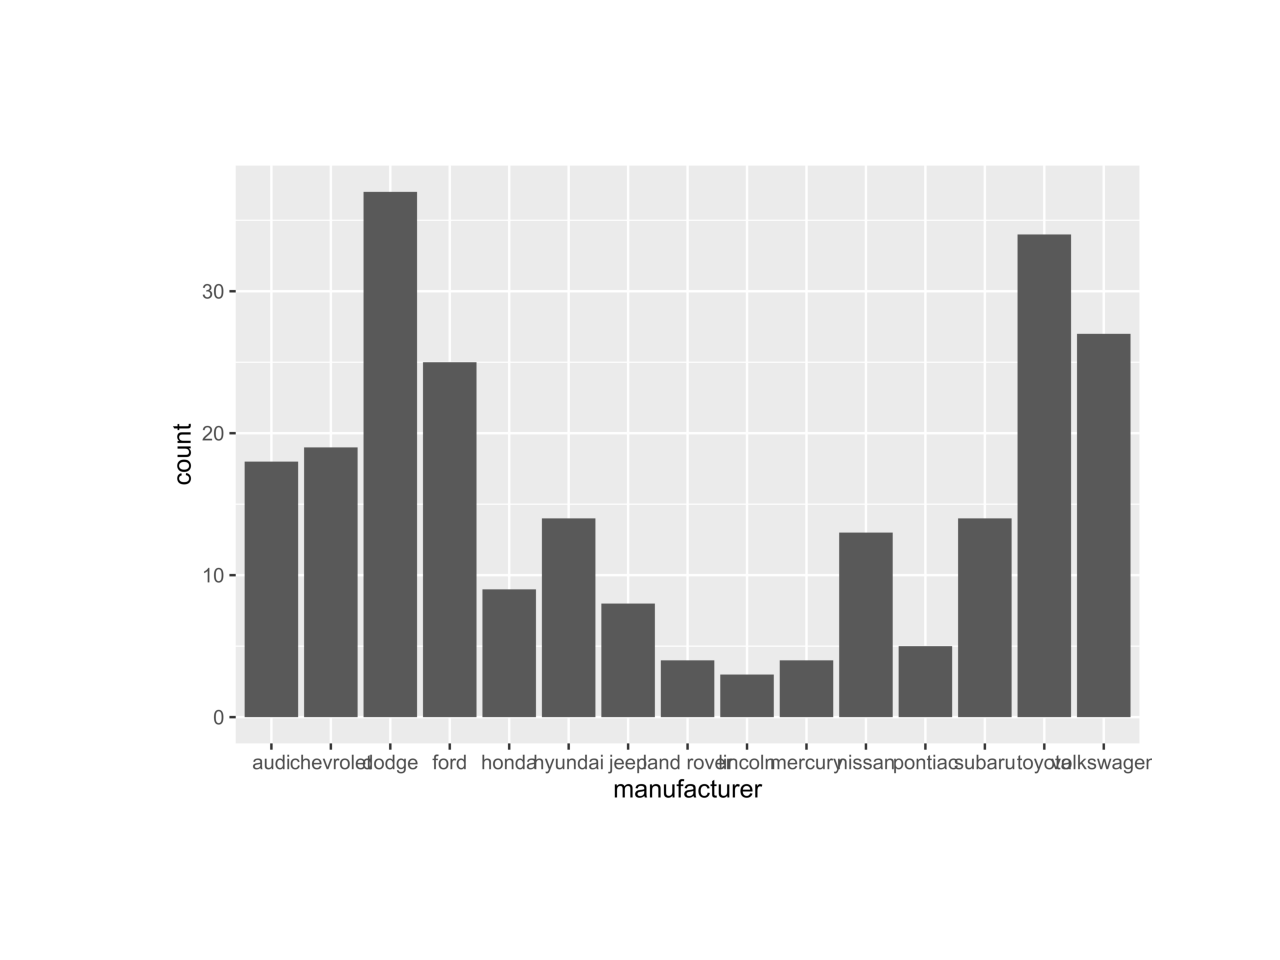

In [121]:
image = Image.open('C:\\Users\\Amell\\Documents\\plot.png')
plt.imshow(image)
plt.axis('off')
plt.show()

In [122]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [123]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [124]:
titanic.duplicated().any()

True

In [125]:
#merging 12 months of data into one file 

In [126]:
import os

In [127]:
k=pd.read_csv("C:\\Users\\Amell\\Downloads\\pandas\\Sales_Data\\Sales_April_2019.csv")

In [128]:
k.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [129]:
all_monthdata=pd.DataFrame()

In [130]:
files=[file for file in os.listdir("C:\\Users\\Amell\\Downloads\\pandas\\Sales_Data")]
for file in files:
    k=pd.read_csv("C:\\Users\\Amell\\Downloads\\pandas\\Sales_Data\\"+file)
    all_monthdata=pd.concat([all_monthdata,k])    

In [131]:
all_monthdata.to_csv('all_data.csv',index=False)

In [132]:
all_monthdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [133]:
# # augment data with additional columns
# add month column

In [134]:
all_monthdata['Order Date']=pd.to_datetime(all_monthdata['Order Date'],format='%m/%d/%y %H:%M', errors='coerce')

In [135]:
all_monthdata['month']=all_monthdata['Order Date'].dt.month

In [136]:
print(all_monthdata['Order Date'].dtypes)


datetime64[ns]


In [137]:
all_monthdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0


Cleaning the data

In [138]:
all_monthdata.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          900
Purchase Address    545
month               900
dtype: int64

In [139]:
nan_rows = all_monthdata[all_monthdata.isnull().any(axis=1)]
nan_rows.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN
356,NaN,NaN,NaN,NaN,NaT,NaN,NaN
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
735,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN


In [140]:
all_monthdata=all_monthdata.dropna(how='all')


In [141]:
nan_rows = all_monthdata[all_monthdata['Order Date'].isna()]
nan_rows.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
1155,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
2878,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN
2893,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN


In [142]:
all_monthdata.dropna(how='any', inplace=True)
all_monthdata.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
month               False
dtype: bool

In [143]:
all_monthdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0


In [144]:
all_monthdata.columns[all_monthdata.duplicated().any()]


C:\Users\Amell\AppData\Local\Temp\ipykernel_2340\2484229505.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


array([['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
        'Order Date', 'Purchase Address', 'month']], dtype=object)

In [145]:
# Convert columns to the correct types

In [146]:
all_monthdata['Quantity Ordered']=pd.to_numeric(all_monthdata['Quantity Ordered'])
all_monthdata['Price Each']=pd.to_numeric(all_monthdata['Price Each'])

In [147]:
# Add a sales column to get total sales
all_monthdata['Total sales']=all_monthdata['Quantity Ordered']*all_monthdata['Price Each']
all_monthdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99


In [148]:
print(all_monthdata['Quantity Ordered'].dtypes)

int64


In [149]:
result=all_monthdata.groupby('month').sum()
result

C:\Users\Amell\AppData\Local\Temp\ipykernel_2340\512102317.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Quantity Ordered,Price Each,Total sales
month,,,
1.0,10903,1811768.38,1822256.73
2.0,13449,2188884.72,2202022.42
3.0,17005,2791207.83,2807100.38
4.0,20558,3367671.02,3390670.24
5.0,18667,3135125.13,3152606.75
6.0,15253,2562025.61,2577802.26
7.0,16072,2632539.56,2647775.76
8.0,13448,2230345.42,2244467.88
9.0,13109,2084992.09,2097560.13


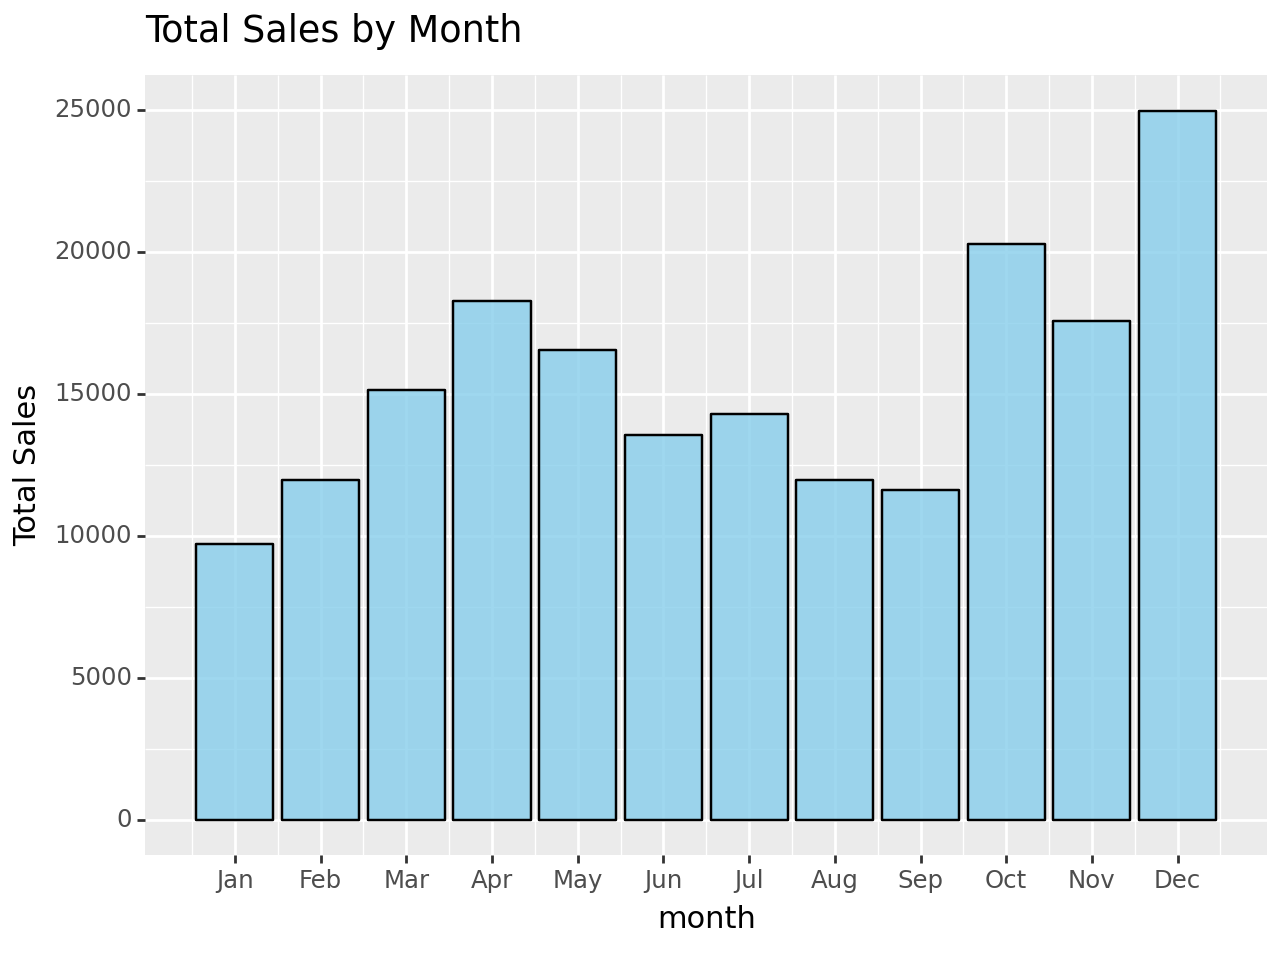

<Figure Size: (640 x 480)>

In [150]:
from  plotnine import *
ggplot(all_monthdata, aes(x='month'))+geom_bar(color='black',fill='skyblue',alpha=0.8)+labs(x='month', y='Total Sales', title='Total Sales by Month')+scale_x_continuous(breaks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

Question;What was the best month for the sale and how much money was earned

Question;which city had the highest sale

In [151]:
all_monthdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99


In [152]:
all_monthdata['City']=all_monthdata['Purchase Address'].str.split(',').str[1].str.strip()
all_monthdata.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4.0,11.95,San Francisco
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4.0,99.99,Seattle
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4.0,11.95,Atlanta
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4.0,1700.00,San Francisco
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4.0,11.99,Boston


In [153]:
def get_zipcode(address):
    return address.split(',')[2].split(' ')[1]

In [154]:
all_monthdata['State']=all_monthdata['Purchase Address'].apply(lambda x:get_zipcode(x))

In [155]:
all_monthdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA


In [156]:
all_monthdata.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
month               False
Total sales         False
City                False
State               False
dtype: bool

In [157]:
all_monthdata.groupby('City').sum()

C:\Users\Amell\AppData\Local\Temp\ipykernel_2340\4239720870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Quantity Ordered,Price Each,month,Total sales
City,,,,
Atlanta,16602,2779908.20,104794.0,2795498.58
Austin,11153,1809873.61,69829.0,1819581.75
Boston,22528,3637409.77,141112.0,3661642.01
Dallas,16730,2752627.82,104620.0,2767975.40
Los Angeles,33289,5421435.23,208325.0,5452570.80
New York City,27932,4635370.83,175741.0,4664317.43
Portland,14053,2307747.47,87765.0,2320490.61
San Francisco,50239,8211461.74,315520.0,8262203.91
Seattle,16553,2733296.01,104941.0,2747755.48


C:\Users\Amell\anaconda3\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


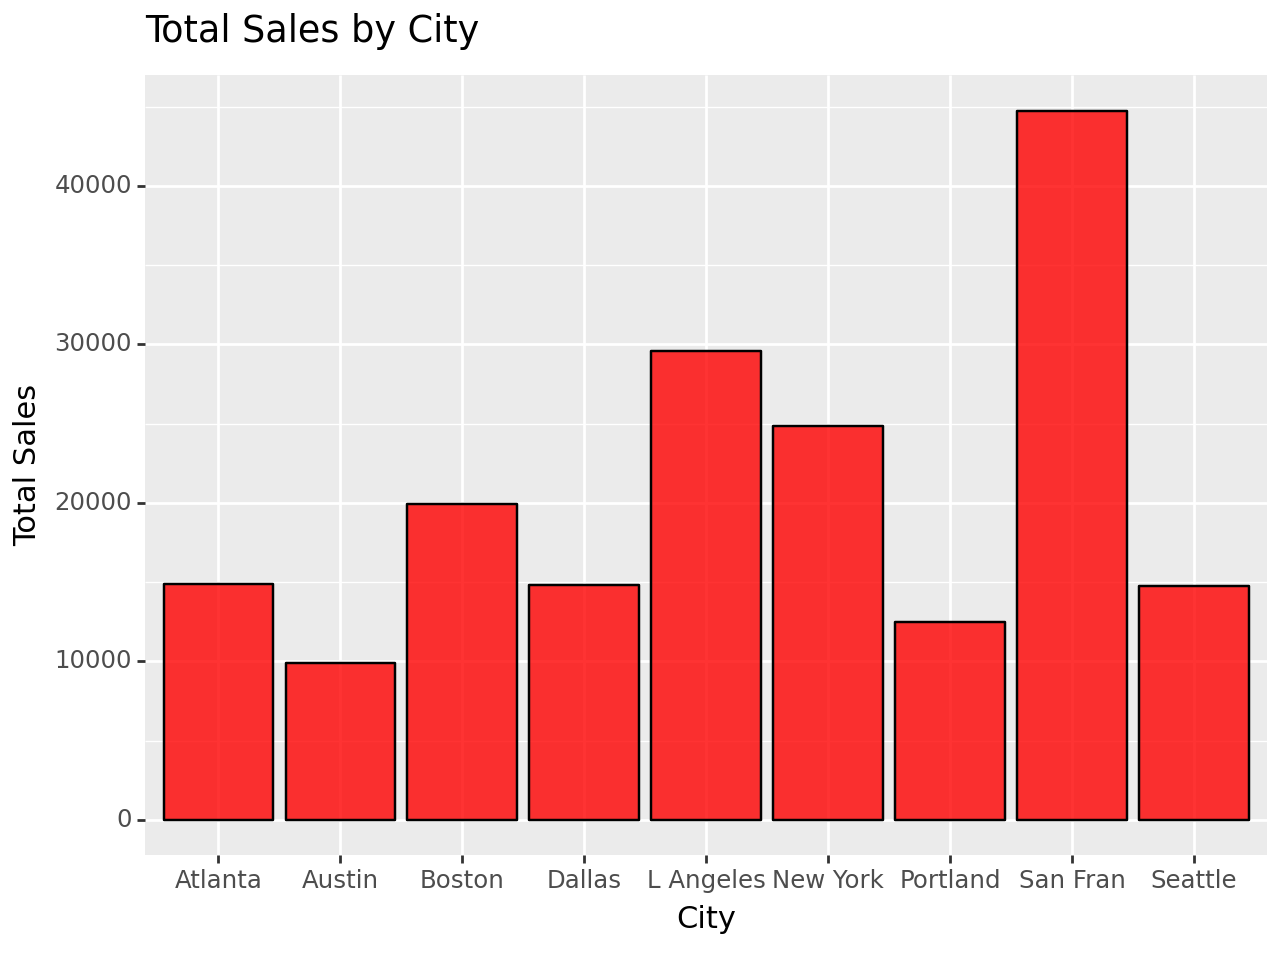

<Figure Size: (640 x 480)>

In [158]:
from  plotnine import *
city_counts = all_monthdata['City'].value_counts()
ggplot(all_monthdata, aes(x='City'))+geom_bar(color='black',fill='red',alpha=0.8)+labs(x='City', y='Total Sales', title='Total Sales by City')+scale_x_discrete(breaks=city_counts.index.tolist(), labels=['Atlanta','Austin','Boston','Dallas','L Angeles','New York','Portland','San Fran','Seattle'])+ scale_fill_cmap(cmap_name='inferno')

What time should we display adverts to maximize the likelihood of the customers buying the product?

In [159]:
all_monthdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA


In [160]:
all_monthdata['Hour']=all_monthdata['Order Date'].dt.hour
all_monthdata['Minute']=all_monthdata['Order Date'].dt.minute
all_monthdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA,9,27


In [161]:
all_monthdata.groupby('Hour').sum()

C:\Users\Amell\AppData\Local\Temp\ipykernel_2340\1117132979.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Quantity Ordered,Price Each,month,Total sales,Minute
Hour,,,,,
0,4428,709296.70,27554.0,713721.27,103596
1,2619,458490.00,16657.0,460866.88,61807
2,1398,233833.64,8507.0,234851.44,32508
3,928,144726.42,5904.0,145757.89,23044
4,937,162058.18,6148.0,162661.01,26876
5,1493,229621.21,9301.0,230679.82,42877
6,2810,445000.11,17539.0,448113.00,80343
7,4556,740568.11,28850.0,744854.12,127447
8,7002,1185970.62,43626.0,1192348.97,198135


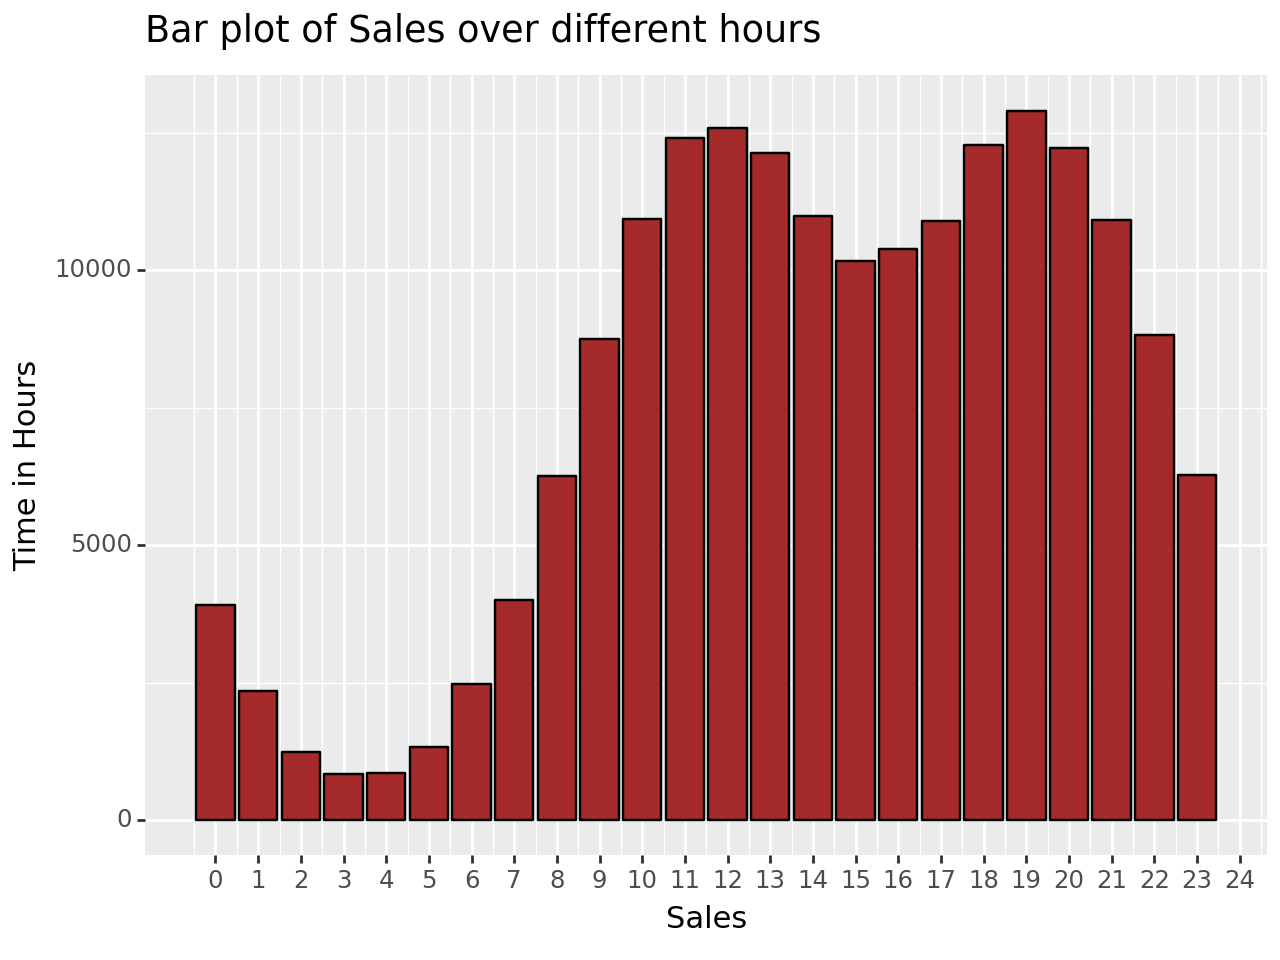

<Figure Size: (640 x 480)>

In [162]:
ggplot(all_monthdata,aes(x='Hour'))+ geom_bar(color='black',fill='brown')+scale_x_continuous(breaks=range(0,25))+labs(x='Sales',y='Time in Hours',title='Bar plot of Sales over different hours')

What products are often sold together

In [163]:
all_monthdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,23.90,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,99.99,Boston,MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA,9,27


In [164]:
# the first step in determining which products are often sold together is to identify the
# duplicated rows based on the Order ID column. This will indicate that multiple products were sold together 
# in the same order.
duplicated_rows = all_monthdata[all_monthdata.duplicated(subset='Order ID', keep=False)]
duplicated_rows.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total sales,City,State,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,11.99,Los Angeles,CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,600.00,Los Angeles,CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4.0,11.95,Los Angeles,CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4.0,99.99,Boston,MA,11,31


In [165]:
# Group the duplicated rows by 'Order ID' and aggregate the 'Product' column to get a list of products 
# for each order. 
# This will give you a mapping of which products were sold together in the same order.
grouped = duplicated_rows.groupby('Order ID')['Product'].apply(list).reset_index()
grouped.head(10)

,Order ID,Product
0,141275,"[USB-C Charging Cable, Wired Headphones]"
1,141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]"
2,141365,"[Vareebadd Phone, Wired Headphones]"
3,141384,"[Google Phone, USB-C Charging Cable]"
4,141450,"[Google Phone, Bose SoundSport Headphones]"
5,141457,"[iPhone, Apple Airpods Headphones]"
6,141478,"[Google Phone, Apple Airpods Headphones]"
7,141550,"[iPhone, Apple Airpods Headphones, Wired Headp..."
8,141587,"[USB-C Charging Cable, Apple Airpods Headphones]"
9,141645,"[Lightning Charging Cable, Wired Headphones]"


In [166]:
from itertools import combinations
product_combinations = []

for products in grouped['Product']:
    pairs=list(combinations(products,2))
    product_combinations.extend(pairs)

product_counts=pd.Series(product_combinations).value_counts().reset_index()    
product_counts.columns=['Product_combinations','frequency']
product_counts.head()

,Product_combinations,frequency
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361


In [167]:
from collections import Counter

In [168]:
sorted_product_counts = product_counts.sort_values(by='frequency', ascending=False)
sorted_product_counts.head()

,Product_combinations,frequency
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361


What product sold the most

In [169]:
all_monthdata.groupby('Product').sum()

C:\Users\Amell\AppData\Local\Temp\ipykernel_2340\1419774893.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Quantity Ordered,Price Each,month,Total sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336.0,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440.0,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558.0,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304.0,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558.0,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370.0,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477.0,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113.0,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224.0,1445700.00,68815,142789


In [170]:
# price each
mean_price=all_monthdata.groupby('Product').mean()['Price Each']
mean_price

C:\Users\Amell\AppData\Local\Temp\ipykernel_2340\2030178290.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [172]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>